In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\gelelety\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gelelety\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gelelety\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gelelety\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [5]:
stroke = pd.read_csv('stroke_data.csv')

In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


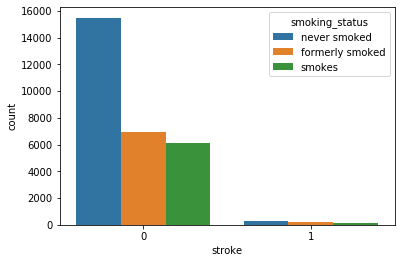

In [7]:
sns.countplot(x='stroke', data=stroke, hue='smoking_status')

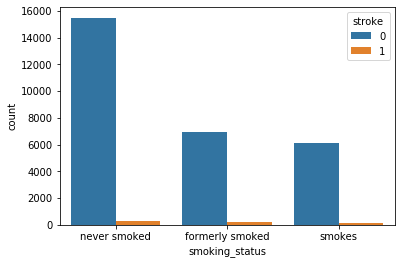

In [8]:
sns.countplot(x='smoking_status', data=stroke, hue='stroke')

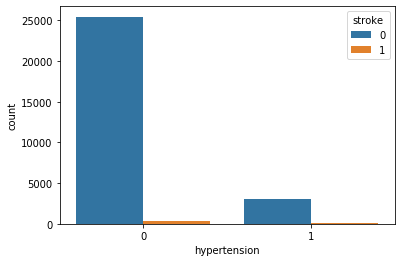

In [9]:
sns.countplot(x='hypertension', hue='stroke', data=stroke)

In [10]:
print(stroke[stroke['stroke']==1]['stroke'].count()/(stroke[stroke['stroke']==1]['stroke'].count()+stroke[stroke['stroke']==0]['stroke'].count()))

0.01885429210390504


In [18]:
stroke_one = stroke[stroke['stroke']==1]
stroke_zero = stroke[stroke['stroke']==0]

In [19]:
stroke_zero['stroke'].count()/stroke_one['stroke'].count()

52.03832116788321

In [20]:
stroke_2 = pd.concat([stroke_one,stroke_one,stroke_one,stroke_one,stroke_one,stroke_one, stroke_one,stroke_one,stroke_one,stroke_one],axis=0)

In [21]:
stroke_zero.count()

gender               28517
age                  28517
hypertension         28517
heart_disease        28517
ever_married         28517
work_type            28517
Residence_type       28517
avg_glucose_level    28517
bmi                  28517
smoking_status       28517
stroke               28517
dtype: int64

In [22]:
df_final = pd.concat([stroke_2,stroke_2,stroke_2,stroke_2,stroke_2,stroke_zero],axis=0)
df_final.count()

gender               55917
age                  55917
hypertension         55917
heart_disease        55917
ever_married         55917
work_type            55917
Residence_type       55917
avg_glucose_level    55917
bmi                  55917
smoking_status       55917
stroke               55917
dtype: int64

In [23]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Text(0.5, 1.0, 'stroke  == 1')

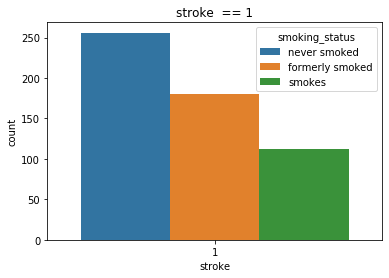

In [24]:
sns.countplot(x='stroke', hue='smoking_status',hue_order=['never smoked','formerly smoked','smokes'], data=stroke_one)
plt.title('stroke  == 1')

Text(0.5, 1.0, 'stroke  == 0')

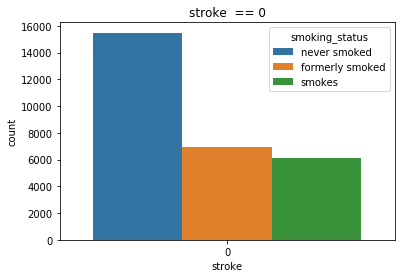

In [25]:
sns.countplot(x='stroke', hue='smoking_status',hue_order=['never smoked','formerly smoked','smokes'], data=stroke_zero)
plt.title('stroke  == 0')

In [26]:
still_smoked_stroke=stroke_one[stroke_one['smoking_status']=='smokes']['stroke'].count()
formerly_smoked_stroke=stroke_one[stroke_one['smoking_status']=='formerly smoked']['stroke'].count()
never_smoked_stroke=stroke_one[stroke_one['smoking_status']=='never smoked']['stroke'].count()
smoked_stroke = still_smoked_stroke+formerly_smoked_stroke+never_smoked_stroke

still_smoked=stroke_zero[stroke_zero['smoking_status']=='smokes']['stroke'].count()
formerly_smoked=stroke_zero[stroke_zero['smoking_status']=='formerly smoked']['stroke'].count()
never_smoked=stroke_zero[stroke_zero['smoking_status']=='never smoked']['stroke'].count()
smoked = still_smoked+formerly_smoked+never_smoked

print('stroke:')
print('smoker')
print(still_smoked_stroke/smoked_stroke)
print('smoker former')
print(formerly_smoked_stroke/smoked_stroke)

print('non stroke:')
print('smoker')
print(still_smoked/smoked)
print('smoker former')
print(formerly_smoked/smoked)

stroke:
smoker
0.20437956204379562
smoker former
0.3284671532846715
non stroke:
smoker
0.21439842900725883
smoker former
0.24241680401164217


In [27]:
print(stroke_one.count())
print(stroke_zero.count())

gender               548
age                  548
hypertension         548
heart_disease        548
ever_married         548
work_type            548
Residence_type       548
avg_glucose_level    548
bmi                  548
smoking_status       548
stroke               548
dtype: int64
gender               28517
age                  28517
hypertension         28517
heart_disease        28517
ever_married         28517
work_type            28517
Residence_type       28517
avg_glucose_level    28517
bmi                  28517
smoking_status       28517
stroke               28517
dtype: int64


In [28]:

df_final.reset_index()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,40,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,97,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,174,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,178,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,197,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
55912,29060,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
55913,29061,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
55914,29062,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
55915,29063,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [29]:
smoking = pd.get_dummies(df_final['smoking_status'])
married = pd.get_dummies(df_final['ever_married'])
married.columns=['nonmarr','mar']
work = pd.get_dummies(df_final['work_type'])
gender = pd.get_dummies(df_final['gender'])

In [30]:
df = df_final.drop(['smoking_status','ever_married','work_type','Residence_type','gender'],axis=1)

In [31]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
40,67.0,0,1,228.69,36.6,1
97,80.0,0,1,105.92,32.5,1
174,49.0,0,0,171.23,34.4,1
178,79.0,1,0,174.12,24.0,1
197,81.0,0,0,186.21,29.0,1


In [32]:
train = pd.concat([df,smoking,married,work,gender],axis=1) 


#Age, hypertension, heart disease, Residence type, Avg Glucose level, BMI and Smoking status

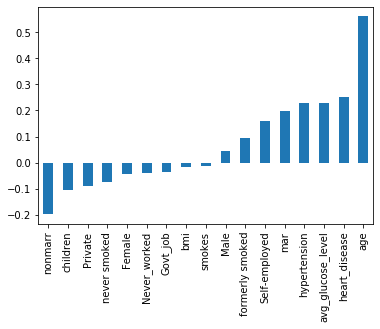

In [33]:
train.corr()['stroke'].sort_values().drop('stroke').plot(kind='bar')
#interesting fact: for sure that with age you have bigger chance to have heartattack, but also, be a male, got married... 
#smoking isn't so big problem and it is healty to have children >D

In [34]:
X = train.drop('stroke',axis=1)
y = train['stroke']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
early = EarlyStopping(monitor='val_loss', mode = 'min', verbose=1, patience=20)

In [38]:
X_train.shape

(37464, 17)

In [39]:
model = Sequential()
model.add(Dense(19, activation='sigmoid',input_shape=(17,)))


model.add(Dense(19, activation='sigmoid'))
model.add(Dropout(0.3))

model.add(Dense(19, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='sigmoid'))
model.add(Dropout(0.3))




model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'Adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout (Dropout)            (None, 19)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout_1 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 19)                380       
_________________________________________________________________
dropout_2 (Dropout)          (None, 19)                0

In [41]:
model.fit(x=X_train,y=y_train,epochs=500, validation_data=(X_test,y_test), callbacks=[early])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 37464 samples, validate on 18453 samples
Epoch 1/500
37464/37464 [==============================] - 5s 138us/sample - loss: 0.7017 - val_loss: 0.6919
Epoch 2/500
37464/37464 [==============================] - 4s 107us/sample - loss: 0.6146 - val_loss: 0.5301
Epoch 3/500
37464/37464 [==============================] - 4s 96us/sample - loss: 0.5476 - val_loss: 0.5230
Epoch 4/500
37464/37464 [==============================] - 3s 88us/sample - loss: 0.5386 - val_loss: 0.5183
Epoch 5/500
37464/37464 [==============================] - 3s 88us/sample - loss: 0.5347 - val_loss: 0.5125
Epoch 6/500
37464/37464 [==============================] - 3s 91us/sample - loss: 0.5309 - val_loss: 0.5107
Epoch 7/500
37464/37464 [==============================] - 3s 89us/sample - loss: 0.5281 - val_loss: 0.5087
Epoch 8/500
37464/37464 [==============================] - 3s 92us/sample - loss: 0.5256 - val_los

37464/37464 [==============================] - 3s 86us/sample - loss: 0.4556 - val_loss: 0.4429
Epoch 147/500
37464/37464 [==============================] - 3s 85us/sample - loss: 0.4555 - val_loss: 0.4427
Epoch 148/500
37464/37464 [==============================] - 3s 86us/sample - loss: 0.4558 - val_loss: 0.4448
Epoch 149/500
37464/37464 [==============================] - 3s 86us/sample - loss: 0.4548 - val_loss: 0.4470
Epoch 150/500
37464/37464 [==============================] - 3s 85us/sample - loss: 0.4535 - val_loss: 0.4425
Epoch 151/500
37464/37464 [==============================] - 4s 95us/sample - loss: 0.4540 - val_loss: 0.4477
Epoch 152/500
37464/37464 [==============================] - 3s 92us/sample - loss: 0.4534 - val_loss: 0.4420
Epoch 153/500
37464/37464 [==============================] - 3s 86us/sample - loss: 0.4540 - val_loss: 0.4446
Epoch 154/500
37464/37464 [==============================] - 3s 93us/sample - loss: 0.4535 - val_loss: 0.4482
Epoch 155/500
37464/3746

37464/37464 [==============================] - 4s 107us/sample - loss: 0.4310 - val_loss: 0.4162
Epoch 295/500
37464/37464 [==============================] - 4s 105us/sample - loss: 0.4308 - val_loss: 0.4180
Epoch 296/500
37464/37464 [==============================] - 3s 93us/sample - loss: 0.4310 - val_loss: 0.4185
Epoch 297/500
37464/37464 [==============================] - 3s 86us/sample - loss: 0.4319 - val_loss: 0.4138
Epoch 00297: early stopping


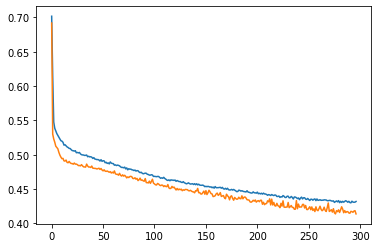

In [42]:
plt.plot(pd.DataFrame(model.history.history))

In [43]:
y_pred_ran = model.predict(X_test)

In [44]:
y_pred = y_pred_ran>0.5

In [45]:
con = confusion_matrix(y_test,y_pred)

In [46]:
#precision is:
(con[0,0]+con[1,1])/(con.sum())
#is 82% - quite good for stroke

0.8254484365685796

In [47]:
con.sum()

18453

In [48]:
con

array([[7142, 2227],
       [ 994, 8090]], dtype=int64)

In [ ]:
#This is still not enough... still missing the Result - e.g. what measure can you do for not having stroke? maybe in the future
#BUT I tryed unbalanced datasets. I kind of skip the part in which I should analyse if the multiplying data change or have affect...
#...on the result. This was skipped during time pressure - i want to go sleep.